<a href="https://colab.research.google.com/github/subhajit100/Pandas-real-life-solutuons/blob/master/ckplus_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd
import keras
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [ ]:
import os,cv2
#directory='/content/gdrive/MyDrive/ckplus_minor/CK+48'
directory='CK+48'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(64,64))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(981, 64, 64, 3)

In [ ]:
 for i in range(7):
    print('No of instances with class value '+ str(i) + ' : ' + str(labels.count(i)))

No of instances with class value 0 : 207
No of instances with class value 1 : 249
No of instances with class value 2 : 54
No of instances with class value 3 : 135
No of instances with class value 4 : 177
No of instances with class value 5 : 84
No of instances with class value 6 : 75


In [ ]:
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_t, y_train, y_t = train_test_split(img_data, Y, test_size=0.2,shuffle= True, random_state=20) 
X_val,X_test,y_val,y_test = train_test_split(X_t,y_t,test_size=0.5,shuffle= False)

In [ ]:
print(X_t.shape)
print(y_t.shape)
y_t=np.where(y_t==1)[1]
y_t

(197, 64, 64, 3)
(197, 7)


array([1, 0, 1, 3, 0, 3, 5, 0, 3, 1, 1, 3, 4, 1, 3, 0, 4, 1, 1, 0, 5, 3,
       6, 3, 0, 4, 1, 4, 5, 3, 1, 2, 1, 0, 6, 2, 3, 0, 3, 5, 5, 4, 6, 3,
       3, 1, 1, 2, 3, 0, 3, 4, 1, 0, 1, 3, 1, 4, 5, 0, 1, 0, 6, 4, 2, 3,
       0, 4, 1, 6, 0, 1, 4, 3, 1, 3, 4, 3, 3, 1, 3, 0, 5, 0, 0, 0, 5, 3,
       4, 6, 0, 4, 2, 0, 1, 2, 4, 5, 0, 0, 3, 1, 0, 4, 1, 1, 4, 5, 0, 0,
       5, 3, 1, 3, 1, 2, 4, 3, 3, 6, 5, 5, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1,
       2, 3, 4, 2, 6, 3, 0, 4, 1, 5, 5, 6, 0, 6, 6, 1, 1, 0, 1, 0, 3, 4,
       0, 1, 0, 3, 0, 0, 0, 0, 0, 6, 1, 3, 2, 0, 1, 1, 1, 4, 0, 4, 1, 1,
       0, 0, 1, 2, 4, 4, 0, 2, 3, 3, 3, 1, 4, 1, 1, 0, 1, 5, 3, 3, 2])

In [ ]:
y_train=np.where(y_train==1)[1]

In [ ]:
y_train.shape

(784,)

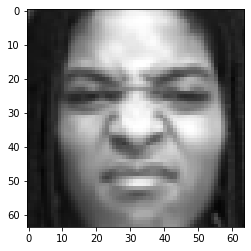

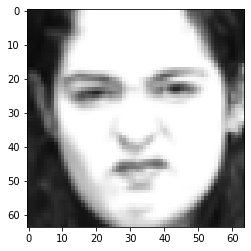

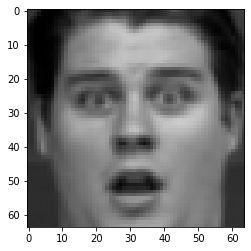

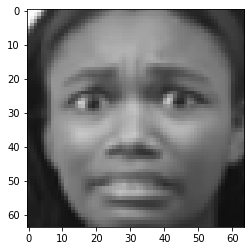

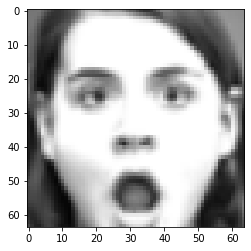

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(X_train[i])
    plt.show()

In [ ]:
from tensorflow.keras import applications
#from tensorflow.keras import layers
vgg_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
feature_extractor=vgg_model.predict(X_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features #This is our X input to RF

In [ ]:
features.shape

(784, 2048)

In [ ]:
vgg_model.summary()  

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_for_training, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test_feature = vgg_model.predict(X_t)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model.predict(X_test_features)

In [ ]:
prediction.shape

(197,)

In [ ]:
prediction

array([1, 0, 1, 3, 0, 3, 3, 0, 3, 1, 1, 3, 4, 1, 3, 0, 4, 6, 1, 0, 3, 3,
       6, 3, 0, 4, 1, 4, 5, 3, 1, 2, 1, 0, 4, 2, 3, 0, 3, 5, 5, 4, 6, 3,
       3, 1, 1, 2, 3, 0, 3, 4, 1, 0, 1, 3, 1, 4, 5, 0, 4, 0, 6, 4, 2, 3,
       0, 4, 1, 6, 0, 1, 4, 3, 1, 3, 4, 3, 3, 1, 3, 0, 5, 0, 0, 0, 5, 3,
       4, 6, 0, 4, 2, 0, 1, 2, 4, 5, 0, 0, 3, 1, 0, 4, 1, 1, 4, 5, 0, 0,
       5, 3, 1, 3, 1, 2, 4, 3, 3, 6, 5, 5, 1, 0, 0, 1, 0, 4, 1, 0, 0, 1,
       2, 3, 4, 2, 6, 3, 0, 4, 1, 3, 5, 6, 0, 6, 0, 1, 1, 0, 1, 0, 4, 4,
       0, 1, 0, 3, 0, 0, 0, 0, 0, 4, 6, 4, 2, 0, 1, 1, 1, 4, 0, 4, 1, 1,
       0, 0, 1, 2, 4, 4, 0, 2, 3, 3, 4, 1, 4, 1, 1, 0, 1, 5, 3, 3, 2])

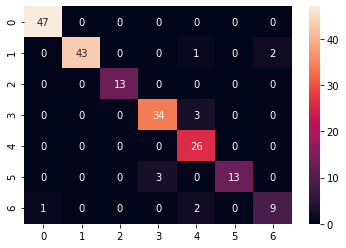

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_t, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
print ("Accuracy of xgboost= ", metrics.accuracy_score(y_t, prediction))

Accuracy =  0.9390862944162437


In [ ]:
print(classification_report(y_t,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.93      0.97        46
           2       1.00      1.00      1.00        13
           3       0.92      0.92      0.92        37
           4       0.81      1.00      0.90        26
           5       1.00      0.81      0.90        16
           6       0.82      0.75      0.78        12

    accuracy                           0.94       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.94      0.94      0.94       197



In [ ]:
wordlabels=["happy", "surprise", "contempt", "anger", "disgust", "sadness", "fear"]

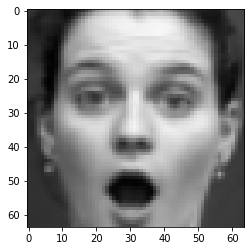

the predicted expression is  surprise
the actual expression is surprise


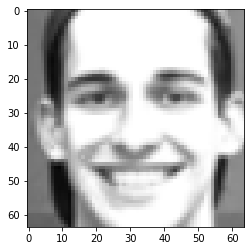

the predicted expression is  happy
the actual expression is happy


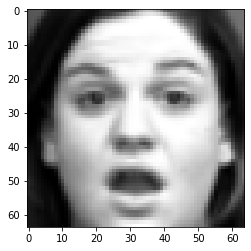

the predicted expression is  surprise
the actual expression is surprise


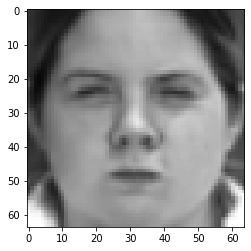

the predicted expression is  anger
the actual expression is anger


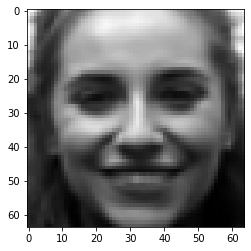

the predicted expression is  happy
the actual expression is happy


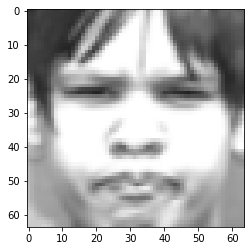

the predicted expression is  anger
the actual expression is anger


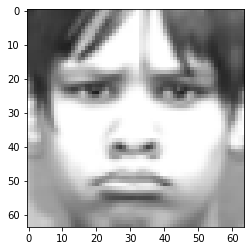

the predicted expression is  anger
the actual expression is sadness


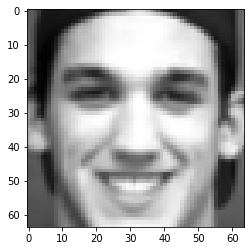

the predicted expression is  happy
the actual expression is happy


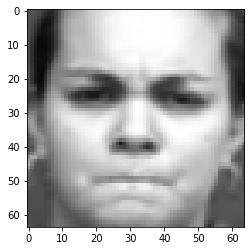

the predicted expression is  anger
the actual expression is anger


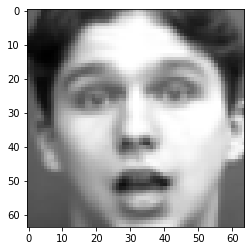

the predicted expression is  surprise
the actual expression is surprise


In [ ]:
nums=0
for i in range(10):  
  myimg = X_t[nums]
  plt.imshow(myimg)
  plt.show()
  input_img = np.expand_dims(myimg, axis=0) #Expand dims so the input is (num images, x, y, c)
  input_img_feature=vgg_model.predict(input_img)
  input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
  my_prediction = model.predict(input_img_features)[0] 
  print("the predicted expression is ",wordlabels[my_prediction])
  print("the actual expression is",wordlabels[y_t[nums]])
  nums+=1

### using SVM model

In [1]:
from sklearn.svm import SVC
svm_model=SVC()

In [3]:
svm_model.fit(X_train,y_train)

In [ ]:
y_svm_predict=svm_model.predict(X_t)

In [ ]:
cm_svm = confusion_matrix(y_t, y_svm_predict)
sns.heatmap(cm_svm, annot=True)

In [ ]:
print ("Accuracy of svm= ", metrics.accuracy_score(y_t, y_svm_predict))

In [ ]:
print(classification_report(y_t,y_svm_predict))